# Camera Calibration

This is a lab on Camera Calibration in CE6003. You should complete the tasks in this lab as part of the Camera Calibration section of the module.

The lab demonstrates the use of OpenCV for calibrating a camera to handle and remove such effects as:

* radial distortion (pincushion, and barrel);
* tangential distortion.

First, if we haven't already done so, we need to clone the various images and resources needed to run these labs into our workspace.  

Note: If you have already run the following step within the session of the runtime, you will see an error of the form `fatal: destination path 'CE6003' already exists and is not an empty directory.` which you can safely ignore.

In [1]:
!git clone https://github.com/EmdaloTechnologies/CE6003.git

Cloning into 'CE6003'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 620 (delta 6), reused 26 (delta 3), pack-reused 587
Receiving objects: 100% (620/620), 962.35 MiB | 38.45 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Checking out files: 100% (540/540), done.


Next, let's load OpenCV and some other helper libraries into our Python runtime.

In [0]:
import numpy as np
import cv2
import glob
import os


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Our repo contains some same chessboard images (uncorrected) that come with OpenCV as sample images.

In [3]:
!ls CE6003/images/lab6

imagesPath = 'CE6003/images/lab6'
images = glob.glob(os.path.join(imagesPath, '*.jpg'))

left01.jpg  left04.jpg	left07.jpg  left11.jpg	left14.jpg
left02.jpg  left05.jpg	left08.jpg  left12.jpg	LICENSE
left03.jpg  left06.jpg	left09.jpg  left13.jpg


Let's take a look at our sample chessboard images from OpenCV.

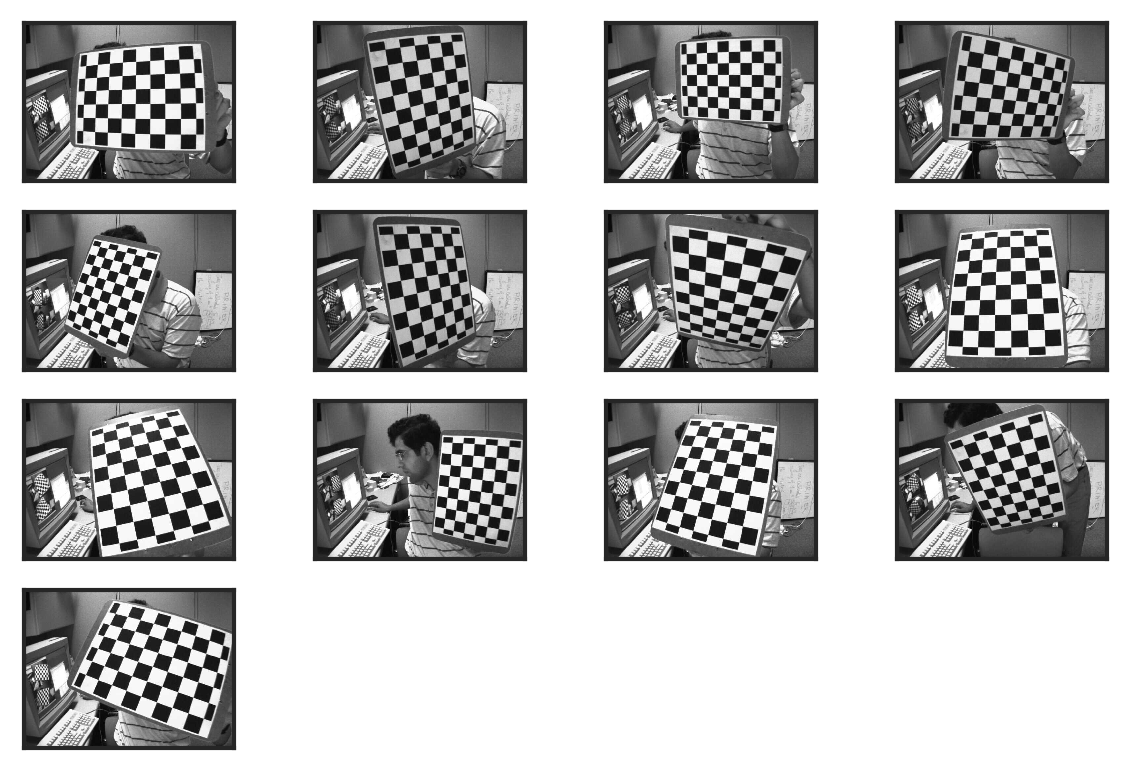

In [4]:
plt.figure(num=None, dpi=240)

numImages = len(images)

maxCols = 4
maxRows = int((numImages + maxCols - 1) / maxCols)

index=0
for fname in images:
  img = cv2.imread(fname)
  plt.subplot(maxRows, maxCols, index+1)
  index+=1

  fig = plt.imshow(img)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)



You can see that they all have warped lines, and are all slighty distorted. Okay, we need to setup a few variables for further processing.

In [0]:
# prepare object points
nx = 7 #number of inside corners in x
ny = 6 #number of inside corners in y
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

objpoints = []
imgpoints = []

Next, for each image, we'll process it and use it to calibrate the camera.

OpenCV has functions specifically to find the corners for chessboards, and also to draw these corners, which we'll make sure of.

Finding chessboard corners in image CE6003/images/lab6/left04.jpg
Finding chessboard corners in image CE6003/images/lab6/left14.jpg
Finding chessboard corners in image CE6003/images/lab6/left01.jpg
Finding chessboard corners in image CE6003/images/lab6/left09.jpg
Finding chessboard corners in image CE6003/images/lab6/left07.jpg
Finding chessboard corners in image CE6003/images/lab6/left11.jpg
Finding chessboard corners in image CE6003/images/lab6/left02.jpg
Finding chessboard corners in image CE6003/images/lab6/left12.jpg
Finding chessboard corners in image CE6003/images/lab6/left05.jpg
Finding chessboard corners in image CE6003/images/lab6/left06.jpg
Finding chessboard corners in image CE6003/images/lab6/left08.jpg
Finding chessboard corners in image CE6003/images/lab6/left13.jpg
Finding chessboard corners in image CE6003/images/lab6/left03.jpg

The camera is now calibrated


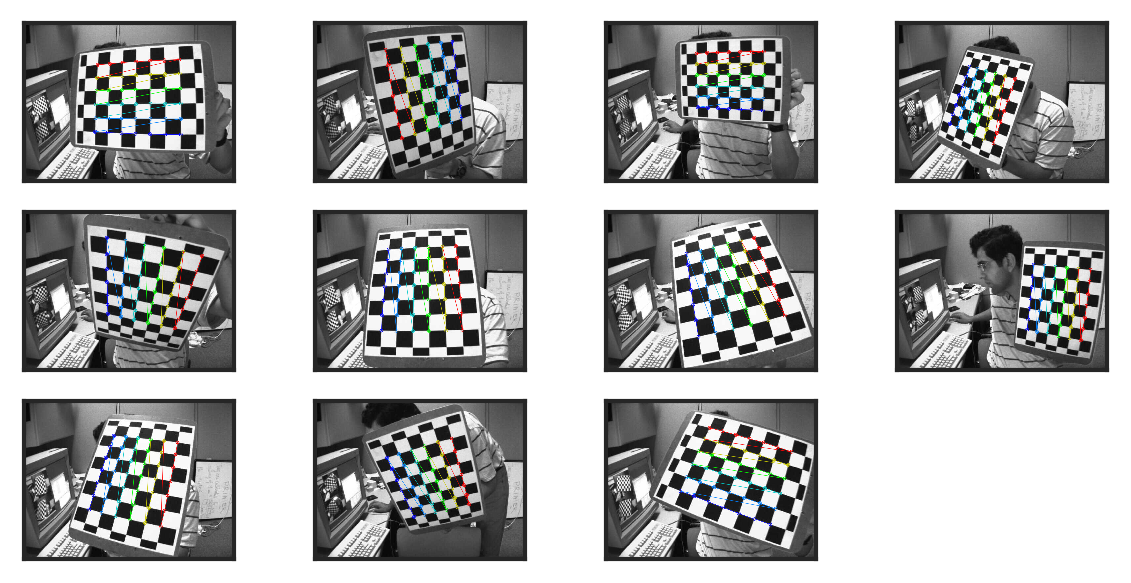

In [6]:
plt.figure(num=None, dpi=240)
index=0

for fname in images:
  print("Finding chessboard corners in image", fname)
  img = cv2.imread(fname)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

  if ret == True:
    objpoints.append(objp)

    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    imgpoints.append(corners2)

    img = cv2.drawChessboardCorners(img, (nx, ny), corners2, ret)
    plt.subplot(maxRows, maxCols, index+1)
    index+=1

    fig = plt.imshow(img)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

ret, cameraMatrix, distCoefficients, rVectors, tVectors = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print('\nThe camera is now calibrated')


Now, let's pick one of those images, and see how it gets corrected. Of course, we could use any image taken with the same camera - it doesn't have to be one of our sample images... But for the sake of convenience here, we'll look at `left12.jpg` ...

OpenCV specifically uses the camera matrix and the distortion coefficients to correct for camera aberrations in the image.

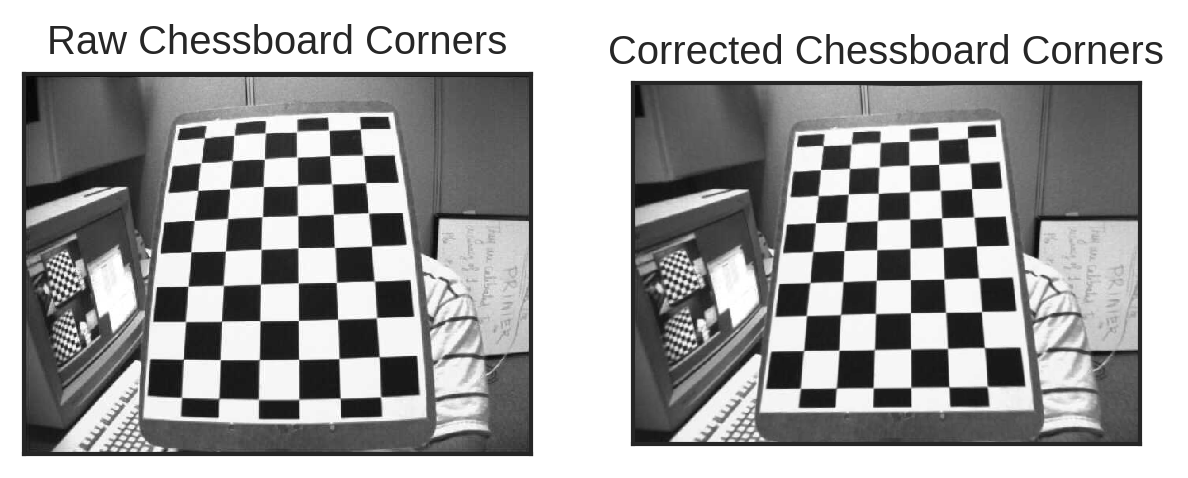

In [7]:
img = cv2.imread(os.path.join(imagesPath,'left12.jpg'))
h, w = img.shape[:2]
newCameraMatrix, roi=cv2.getOptimalNewCameraMatrix(cameraMatrix, distCoefficients, (w, h), 1, (w, h))

undistortedImg = cv2.undistort(img, cameraMatrix, distCoefficients, None, newCameraMatrix)
x, y, w, h = roi
undistortedImg = undistortedImg[y:y+h, x:x+w]

plt.figure(dpi=240)
plt.subplot(1,2,1)
plt.title("Raw Chessboard Corners")
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.subplot(1,2,2)
plt.title("Corrected Chessboard Corners")
fig = plt.imshow(undistortedImg)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


The corrected image looks much better. The lines are straight, and we have none of the barrel distortion we had in the original image. 

If we had other images from the same camera, we could now easily correct them for distortions.